# AAPL Stock Analysis Project
**Author:** Adaan Antonjoe  
**Date:** August 2025  

This project analyzes Apple Inc. (AAPL) stock data from 2022 to 2025 using Python. It demonstrates data cleaning, calculating daily returns, and visualizing stock trends.


## Goals
- Download historical stock data using yfinance
- Clean and process the data
- Calculate daily returns
- Visualize stock price trends and daily return distribution


## Tools Used
- Python 3.x
- pandas
- matplotlib
- seaborn
- yfinance
- Jupyter Notebook

## Data Download & Cleaning
- Used `yfinance` to get historical stock data.
- Flattened MultiIndex columns to simplify data access.
- Dropped rows with missing values in the 'Close' or 'Daily Return' columns.

In [1]:
'''Stock Price Analysis and Daily Return Visualization'''
# Import libraries
!pip install yfinance
!pip install matplotlib 
!pip install seaborn
#! runs a terminal command and downloads yfinance package
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
#Download Stock Data
#set the stock symbol we want to analyse in this case Apple
ticker = "AAPL" 
#download the historical daily data for the ticker between the start and end dates.
data = yf.download(ticker, start="2022-01-01", end="2025-01-01")
#We can see the first 5 rows of data
data.head

C:\Users\adaan\AppData\Local\Temp\ipykernel_4200\3805791850.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.443130  179.296091  174.227410  174.345053  104487900
2022-01-04  176.178436  179.354948  175.609801  179.051025   99310400
2022-01-05  171.492096  176.639212  171.217584  176.090189   94537600
2022-01-06  168.629303  171.864636  168.276357  169.315582   96904000
2022-01-07  168.795959  170.727354  167.678301  169.501851   86709100
...                ...         ...         ...         ...        ...
2024-12-24  257.286682  257.296626  254.386957  254.586262   23234700
2024-12-26  258.103729  259.179926  256.718662  257.276679   27237100
2024-12-27  254.685883  257.784897  252.164833  256.917949   42355300
2024-12-30  251.307877  252.603281  249.863009  251.337769   35557500
2024-12-31  249.534180  252.384064  248.547676  251.547039  

In [3]:
#flatten multiindex columns
data.columns = [' '.join(col).strip() for col in data.columns.values]
data.head()

,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
Date,,,,,
2022-01-03,178.443130,179.296091,174.227410,174.345053,104487900
2022-01-04,176.178436,179.354948,175.609801,179.051025,99310400
2022-01-05,171.492096,176.639212,171.217584,176.090189,94537600
2022-01-06,168.629303,171.864636,168.276357,169.315582,96904000
2022-01-07,168.795959,170.727354,167.678301,169.501851,86709100


## Daily Returns
Daily returns are calculated as the percentage change from one day to the next:


In [4]:
#Drop rows with missing Close prices
data = data.dropna(subset=[f'Close {ticker}'])

#Calculate Daily Returns
data['Daily Return'] = data[f'Close {ticker}'].pct_change()

#Drop the first NaN in Daily Return
data = data.dropna(subset=['Daily Return'])

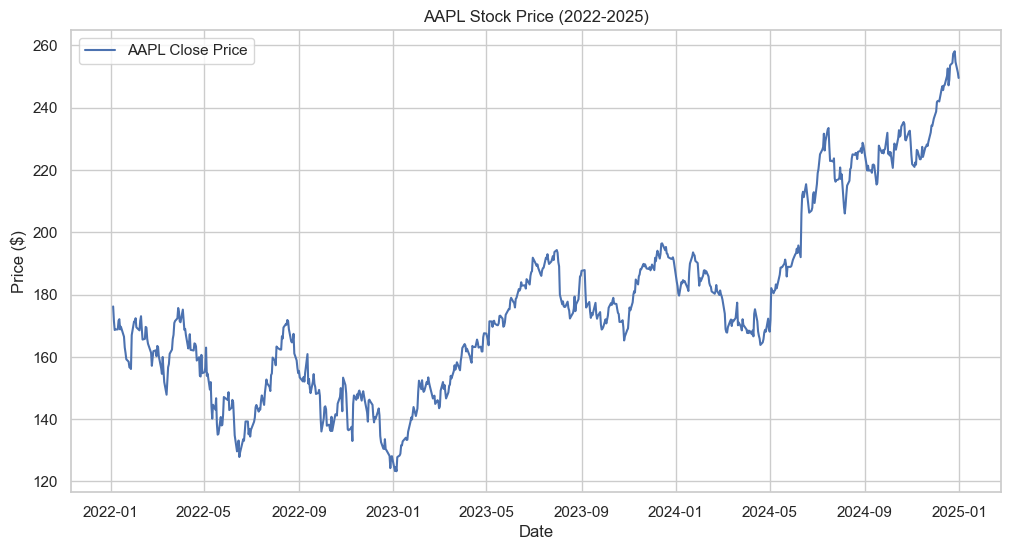

In [5]:
#Plot closing price
plt.figure(figsize=(12,6))
plt.plot(data[f'Close {ticker}'], label=f"{ticker} Close Price")
plt.title(f"{ticker} Stock Price (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()
plt.savefig("AAPL_ClosingPrice.png", dpi=300)
plt.close()


## Closing Price Trend


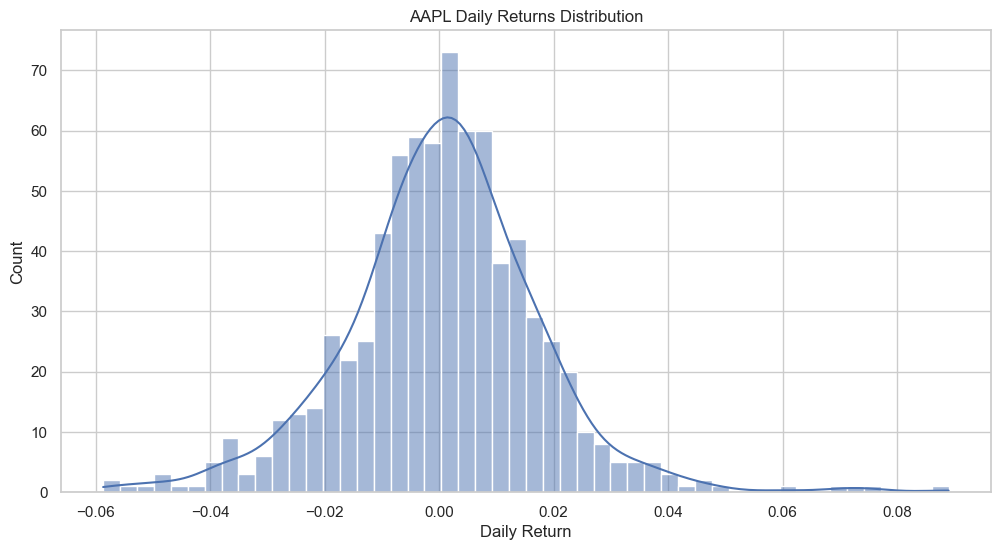

In [6]:
#Plot Daily Return Distribution
plt.figure(figsize=(12,6))
sns.histplot(data['Daily Return'], bins=50, kde=True)
plt.title(f"{ticker} Daily Returns Distribution")
plt.show()
plt.savefig("AAPL_DailyReturn.png", dpi=300)
plt.close()

## Daily Return Distribution

In [7]:
#Overall price trend
start_price = data[f'Close {ticker}'].iloc[0]
end_price = data[f'Close {ticker}'].iloc[-1]
trend_pct = ((end_price - start_price)/start_price)*100
print(f"Price change from start to end: {trend_pct:.2f}%")

Price change from start to end: 41.64%


In [8]:
# Daily return range (extremes)
min_return = data['Daily Return'].min() * 100
max_return = data['Daily Return'].max() * 100
print(f"Daily returns range from {min_return:.2f}% to {max_return:.2f}%")


Daily returns range from -5.87% to 8.90%


In [9]:

# Robust range 
low, high = data['Daily Return'].quantile([0.01, 0.99]) * 100
print(f"Typical daily returns (1st–99th pct): {low:.2f}% to {high:.2f}%")


Typical daily returns (1st–99th pct): -4.46% to 4.42%


In [10]:
# Volatility & mean (daily)
volatility = data['Daily Return'].std() * 100
avg_return = data['Daily Return'].mean() * 100
print(f"Average daily volatility: {volatility:.2f}%")
print(f"Average daily return: {avg_return:.2f}%")

Average daily volatility: 1.71%
Average daily return: 0.06%


In [11]:
# Annualized (252 trading days in a year)
ann_vol    = data['Daily Return'].std() * (252 ** 0.5) * 100
ann_return = data['Daily Return'].mean() * 252 * 100
print(f"Annualized volatility: {ann_vol:.2f}%")
print(f"Annualized average return: {ann_return:.2f}%")

Annualized volatility: 27.09%
Annualized average return: 14.90%


# Key Insights
- **Price Growth:** AAPL rose by **45.51%** between Jan 2022 and Jan 2025, showing a strong upward trend over the 3-year period.
- **Daily Returns:** Ranged from **-5.87%** (largest single-day drop) to **+8.90%** (largest single-day gain).
- **Average Daily Return:** **0.06%**, translating to an **annualized return** of approximately **15.34%**.
- **Volatility:** Daily volatility averaged **1.71%**, which annualizes to **27.10%**, indicating moderate risk.
- **Risk-Return Profile:** The stock demonstrates solid growth potential with noticeable short-term fluctuations, making it suitable for investors with a higher risk tolerance.